In [1]:
import cv2
import re
import pytesseract
from ipyfilechooser import FileChooser
import os
import numpy as np
from matplotlib import pyplot as plt
from pytesseract import Output

In [2]:
# Selecionar arquivo

fdialog = FileChooser(
    os.getcwd(),
    filename='test.txt',
    title='<b>FileChooser example</b>',
    show_hidden=False,
    select_default=True,
    show_only_dirs=False
)

# display(fdialog)

# arquivo = fc.selected
arquivo = 'cupom4.jpg'

In [3]:
img = cv2.imread(arquivo)

In [4]:
custom_config = r'--oem 3 --psm 6 -l por'
texto_lido = pytesseract.image_to_string(img, config=custom_config)

print(texto_lido)


Epson do Brasil Ind, e Com.
Epson do Brasil
fu. Tucunaré 720
06460-020
CNPJ: 52.106.911/0001-00
TE: 206108738115
IH: 987654321098
07/07/2007 12:56:19  CCF:000010 C00:000035
CUPOM FISCAL
ITEM CÓDIGO DESCRIÇÃO
QID. UN. UL UNIT AS ST VL ITEM R$
1 7890000001234 Padaria 1UN X 12,00 Ta 12,008
2 7890000004321 Verduras e Legunes
TUM X 5,00 Tb 5,008
3 7890000001111 Frios en geral tUN X 4,00 Tb 4,008
TOTAL R$ 21.00
Dinheiro 50,00
Obrigado - Volte Senpre
TROCO Rs 29,00
Ta=12,00% Tb=18,00%
CCDACA  aM4paD  DIEI3B  BECAAS 30124  4DB325
EPSON TH-T81 FBLI
ECF-IF VERSÃO: 01.00.04 ECF;001 1J:001
PRE EgÇ 07/07/2007 12:57:35
FAB: EP040710000000000963 E



### Retorna imagem em tons de cinza

In [5]:
def get_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Remoção de ruído

In [6]:
def remove_noise(img):
    return cv2.medianBlur(img, 5)

### Thresholding

In [7]:
def thresholding(img):
    return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

### Dilation

In [8]:
def dilate(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

### Erosion

In [9]:
def erode(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(img, kernel, iterations = 1)

### opening -> erosion + dilation

In [10]:
def opening(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

### Canny edge detection

In [11]:
def canny(img):
    return cv2.Canny(img, 100, 200)

### Skew correction

In [12]:
def deskew(img):
    coords = np.column_stack(np.where(img > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.wapAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

### Match template

In [13]:
def match_template(img, template):
    return cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

## Workspace:

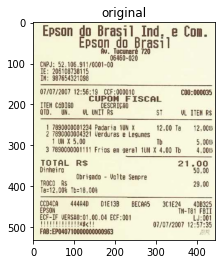

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('original')
plt.show()

In [15]:
# de_skew = opening(img)
# gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
# plt.imshow(deskew)
# plt.title('deskew')
# plt.show()

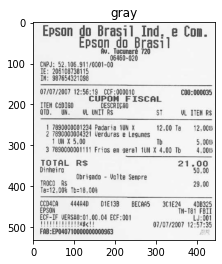

In [16]:
gray = get_grayscale(img)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray_rgb)
plt.title('gray')
plt.show()

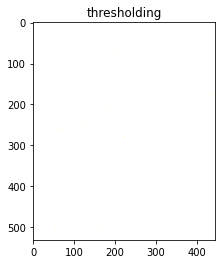

In [17]:
thresh = thresholding(img)
thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh_rgb)
plt.title('thresholding')
plt.show()

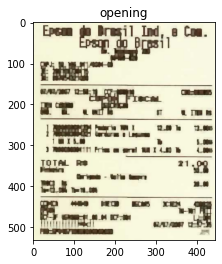

In [18]:
opening = opening(img)
opening_rgb = cv2.cvtColor(opening, cv2.COLOR_BGR2RGB)
plt.imshow(opening_rgb)
plt.title('opening')
plt.show()

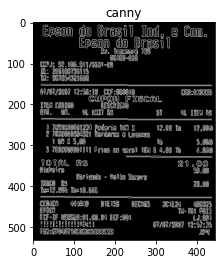

In [19]:
canny_ = canny(img)
canny_rgb = cv2.cvtColor(canny_, cv2.COLOR_BGR2RGB)
plt.imshow(canny_rgb)
plt.title('canny')
plt.plot(4,4)
plt.show()

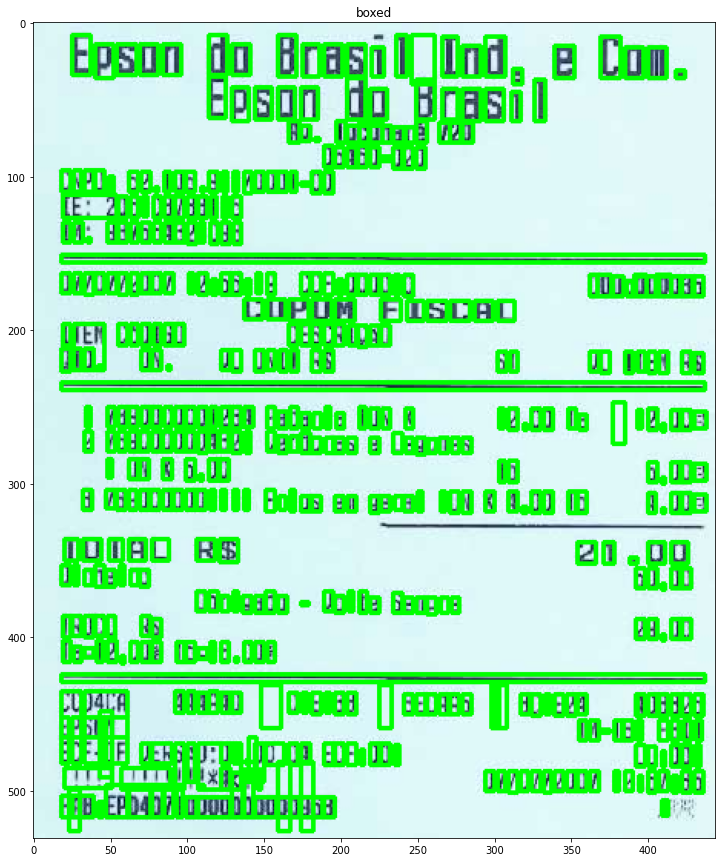

In [20]:
h, w, c = img.shape
box_img = img
boxes = pytesseract.image_to_boxes(box_img) 
for b in boxes.splitlines():
    b = b.split(' ')
    box_img = cv2.rectangle(box_img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


plt.figure(figsize = (25,15))
plt.imshow(box_img)
plt.title('boxed')
plt.plot(8,8)
plt.show()

"Epson"
"do"
"Brasil"
"Ind."
"e"
"Com."
"Epson"
"do"
"Brasil"
"fu."
"Tucunaré"
"720"
"06460-020"
"CNPJ:"
"52.106.911/0001-00"
CNPJ: 52.106.911/0001-00
"TE:"
"1H:"
"987654321098"
"07/07/2007"
Data: 07/07/2007
"CCF:000010"
"C00:000035"
"CUPOM"
"FISCAL"
"ITEM"
"CÓDIGO"
"DESCRIÇÃO"
"UN."
"UNIT"
"RS"
"VL"
"ITEM"
"R$"
"1"
"7890000001234"
"Padaria"
"1UN"
"X"
"12,00"
"Ta"
"12,008"
"2"
"7890000004321"
"Verduras"
"e"
"Legunes"
"X"
"5,00"
"Tb"
"5,008"
"3"
"Frios"
"en"
"geral"
"X"
"4,00"
"Tb"
"4,008"
"TOTAL"
"R$"
"21.00"
"Dinheiro"
"50,00"
"Obrigado"
"-"
"Volte"
"Senpre"
"TROCO"
"As"
"29,00"
"Ta=12,00%"
"Tb=18,00%"
"EPSON"
"TH-T81"
"ECF-IF"
"07/07/2007"
Data: 07/07/2007
"12:57:35"
"FAB:"
"EP040710000000000963"


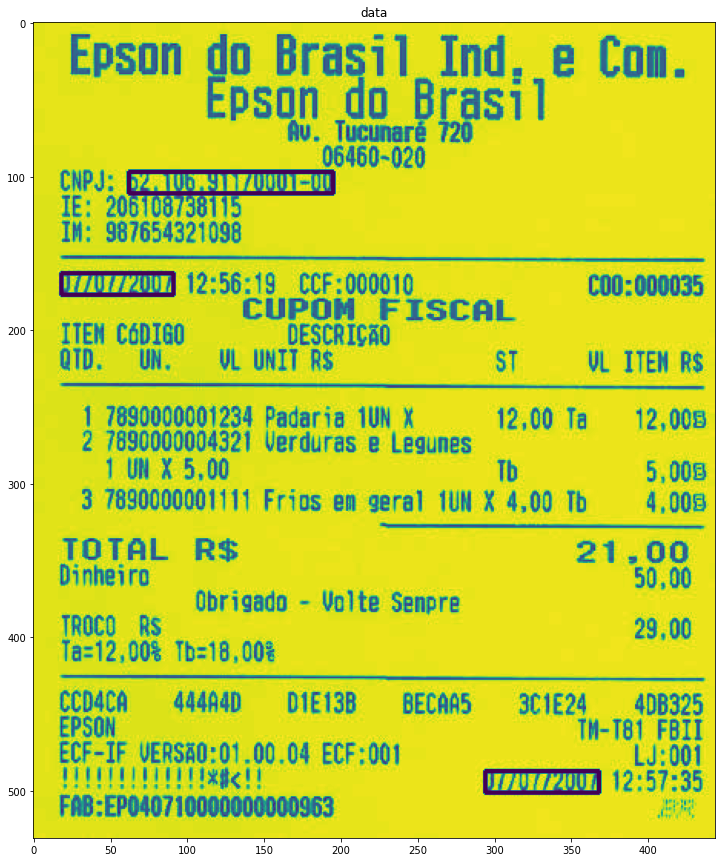

In [56]:
h, w, c = img.shape

des_img = cv2.imread(arquivo)
# des_img = deskew(cv2.imread('cupom2.jpg'))
# des_img_rgb = cv2.cvtColor(des_img, cv2.COLOR_BGR2RGB)
gray_img = get_grayscale(des_img)
cann = canny(gray_img)
box_word_img = gray_img

my_config={'keep_default_na': False, 'na_values': ["nan"]}
d = pytesseract.image_to_data(box_word_img, output_type=Output.DICT, lang='por',config=custom_config)
date_pattern = '^(0?[1-9]|[12][0-9]|3[01])[\/\-](0?[1-9]|1[012])[\/\-]\d{4}$'
#cnpj_pattern = '([0-9]{2}[\.]?[0-9]{3}[\.]?[0-9]{3}[\/]?[0-9]{4}[-]?[0-9]{2})|([0-9]{3}[\.]?[0-9]{3}[\.]?[0-9]{3}[-]?[0-9]{2})'
cnpj_pattern = '[0-9]{2}\.?[0-9]{3}\.?[0-9]{3}\/?[0-9]{4}\-?[0-9]{2}'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # box_word_img = cv2.rectangle(box_word_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        texto = d['text'][i]
        print(f'"{texto}"')
        if re.match(date_pattern, texto):
            print(f'Data: {texto}')
            box_word_img = cv2.rectangle(box_word_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        if re.match(cnpj_pattern, texto):
            print(f'CNPJ: {texto}')
            box_word_img = cv2.rectangle(box_word_img, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.figure(figsize = (25,15))
plt.imshow(box_word_img)
plt.title('data')
plt.plot(8,8)
plt.show()

In [54]:
cnpj = re.search(r'[0-9]{2}\.?[0-9]{3}\.?[0-9]{3}\/?[0-9]{4}\-?[0-9]{2}', texto_lido)
if cnpj:
    print(f'CNPJ: {cnpj.group()}')
    
data = re.search('\d{2}/\d{2}/\d{4}', texto_lido)
if data:
    print(f'Data: {data.group()}')

dividido = re.split("\s", texto_lido)

for t in dividido:
    if re.match(date_pattern, t):
        print(f'Data (2): {t}')
    if re.match(cnpj_pattern, t):
        print(f'CNPJ (2): {t}')

print(f'\nTexto: {texto_lido}')
print(f'Dividido: {dividido}')

CNPJ: 52.106.911/0001-00
Data: 07/07/2007
Data (2): 07/07/2007
Data (2): 07/07/2007

Texto: Epson do Brasil Ind, e Com.
Epson do Brasil
fu. Tucunaré 720
06460-020
CNPJ: 52.106.911/0001-00
TE: 206108738115
IH: 987654321098
07/07/2007 12:56:19  CCF:000010 C00:000035
CUPOM FISCAL
ITEM CÓDIGO DESCRIÇÃO
QID. UN. UL UNIT AS ST VL ITEM R$
1 7890000001234 Padaria 1UN X 12,00 Ta 12,008
2 7890000004321 Verduras e Legunes
TUM X 5,00 Tb 5,008
3 7890000001111 Frios en geral tUN X 4,00 Tb 4,008
TOTAL R$ 21.00
Dinheiro 50,00
Obrigado - Volte Senpre
TROCO Rs 29,00
Ta=12,00% Tb=18,00%
CCDACA  aM4paD  DIEI3B  BECAAS 30124  4DB325
EPSON TH-T81 FBLI
ECF-IF VERSÃO: 01.00.04 ECF;001 1J:001
PRE EgÇ 07/07/2007 12:57:35
FAB: EP040710000000000963 E

Dividido: ['Epson', 'do', 'Brasil', 'Ind,', 'e', 'Com.', 'Epson', 'do', 'Brasil', 'fu.', 'Tucunaré', '720', '06460-020', 'CNPJ:', '52.106.911/0001-00', 'TE:', '206108738115', 'IH:', '987654321098', '07/07/2007', '12:56:19', '', 'CCF:000010', 'C00:000035', 'CUPOM', 